`NOTE: This document will include plots, data, and code-snippets. (It will probably be a bit messy)`

# Libraries

In [32]:
source("tools.R")

Parsed with column specification:
cols(
  .default = col_double(),
  userId = col_character(),
  age = col_character(),
  datetime = col_character(),
  gender = col_character(),
  datetime_1 = col_character(),
  stage = col_integer(),
  scenario = col_character(),
  subcondition = col_integer(),
  pageIndex = col_integer(),
  noiseIndex = col_integer(),
  day0 = col_character(),
  day1 = col_character(),
  day2 = col_character(),
  day3 = col_character(),
  day4 = col_character(),
  day5 = col_character(),
  day6 = col_character(),
  day7 = col_character(),
  day8 = col_character(),
  day9 = col_character()
  # ... with 69 more columns
)
See spec(...) for full column specifications.
Warning message in eval(substitute(expr), envir, enclos):
"NAs introduced by coercion"

# Figure of trend damping (quintessential example)

In [33]:
n_points <- 30

x <- 1:n_points

y <- 1:n_points
y <- jitter(y, factor = 30)

data_pos <- data.frame(x, y =  y)
data_neg <- data.frame(x, y = -y)

In [34]:
linear <- function(x) { x }

In [35]:
linear_neg <- function(x) { -x }

In [36]:
max_v <- 45

In [37]:
# Logistic function
L  <- 45
x0 <- 10 #midpoint value
k  <- 0.10

func <- function(x) { (L / (1 + exp(-k*(x - x0)))) - 12 }

In [106]:
# Plot
p1 <- ggplot(data=data_pos, aes(x=x, y=y)) +
            stat_function(fun = linear, colour = "black", lty="dashed", alpha=0.6) +
            stat_function(fun = func, colour = "black", lty="solid", alpha=0.6) +
            geom_point(shape=21, size=4) +

            # Axes
            coord_cartesian(ylim=c(1, max_v)) + 
            scale_x_continuous(limits = c(1, max_v)) + 
            #scale_y_continuous(limits = c(0, 40)) + 

            # Theme
            theme_bw() + 
            ggthemes::theme_few() + 
            theme(text = element_text(size=12, family="serif")) +
            theme(plot.title = element_text(hjust = 0.5)) +
            theme(  axis.title.x = element_blank(),
                    axis.text.x  = element_blank(),
                    #axis.ticks.x = element_blank(),
                    axis.title.y = element_blank(),
                    axis.text.y  = element_blank(),
                    #axis.ticks.y = element_blank()
                 )

In [107]:
# Logistic function
L_  <- 35
x0_ <- 10 #midpoint value
k_  <- 0.1

func_ <- function(x) { - ((L_ / (1 + exp(-k_ *(x - x0_)))) - 9 )}

In [108]:
# Plot
p2<- ggplot(data=data_neg, aes(x=x, y=y)) +
            stat_function(fun = linear_neg, colour = "black", lty="dashed", alpha=0.6) +
            stat_function(fun = func_, colour = "black", lty="solid", alpha=0.6) +
            geom_point(shape=21, size=4) +

            # Axes
            coord_cartesian(ylim=c(-1, -max_v)) + 
            scale_x_continuous(limits = c(1, max_v)) + 
            #scale_y_continuous(limits = c(0, 40)) + 

            # Theme
            theme_bw() + 
            ggthemes::theme_few() + 
            theme(text = element_text(size=12, family="serif")) +
            theme(plot.title = element_text(hjust = 0.5)) +
            theme(  axis.title.x = element_blank(),
                    axis.text.x  = element_blank(),
                    #axis.ticks.x = element_blank(),
                    axis.title.y = element_blank(),
                    axis.text.y  = element_blank(),
                    #axis.ticks.y = element_blank()
                 )

In [116]:
pdf("Images/paper_images/trend_damping_explanation.pdf", width=8, height=3.0)
multiplot(p1, p2, cols=2)
dev.off()

png 
  2

# Real-world data

We have to get real world data for six scenarios. The state of each one currently is:

DONE:
- `Temperature: wunderground`
- `Rain: wunderground`
- `Gym members: https://trends.google.com/trends/explore?date=today%205-y&geo=GB&q=gym`
- `Sales: https://www.ons.gov.uk/businessindustryandtrade/retailindustry/timeseries/j43s/drsi`
- `Salary: http://www.hamiltonproject.org/charts/career_earnings_by_college_major/  <- Median annual earnings over career`
- `Facebook friends (US and Canada): https://www.statista.com/statistics/247614/number-of-monthly-active-facebook-users-worldwide/`

Sales: 
- Title	RSI:Value Not seasonally Adjusted:All Retailers ex fuel:All Business Index
- CDID	J43S
- Source dataset ID	DRSI
- PreUnit	
- Unit	
- Release date	20-09-17
- Next release	19-Oct-17


# Save my Facebook data:

In [ ]:
fbqv <- read_csv ('data/real-world/3- for_compositional_analysis/facebook_qv.csv')

fbqv <- fbqv %>% 
        group_by(Trimester) %>%
        summarize(added_trimester = sum(added))

fbqv <- within(fbqv, accum <- cumsum(added_trimester))

write.table(fbqv, file = "data/real-world/4- for_compositional_analysis/facebook_qv.csv",row.names=TRUE, col.names=TRUE, na="", sep=",")

## Temperature

In [11]:
weather <- read_csv("data/real-world/2- filtered_and_transformed/weather.csv")

weather$temp_high <- as.numeric(weather$temp_high)

Parsed with column specification:
cols(
  .default = col_integer(),
  `Wind low` = col_character(),
  precipitation_sum_mm = col_double(),
  Events = col_character()
)
See spec(...) for full column specifications.


In [12]:
weather$year_month <- ifelse(nchar(weather$month) == 1,
                           paste0(weather$year, ' 0', weather$month), 
                           paste0(weather$year,  ' ', weather$month))

In [13]:
weather_data <- weather %>%
                    group_by(year_month) %>%
                    summarize(temperature_mean = mean(temp_high))

p <- weather_data %>%
     ggplot(aes(x=year_month, y=temperature_mean, group=1)) +
        geom_line() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

if(FALSE) {
    # Save image
    svg("data/real-world/images/weather.svg", width=8, height=4)
    p
    dev.off()

    # Save csv
    colnames(weather_data) = c('x', 'y')
    write.csv(weather_data, file = "data/real-world/3- for_compositional_analysis/temperature.csv")
}

## Rain

Non-moving window: probability of event

In [14]:
weather$rain <- grepl("Rain", weather$Events)

In [44]:
weather$week <- floor((weather$day_n-1) / 7) + 1

In [39]:
weather$trimester_n <- floor((weather$month) / 4) + 1
weather$year_trimester <- paste(weather$year, weather$trimester_n)

weather$semester_n <- floor((weather$month) / 7) + 1
weather$year_semester <- paste(weather$year, weather$semester_n)

#weather %>% select(year, month, semester_n) %>% unique

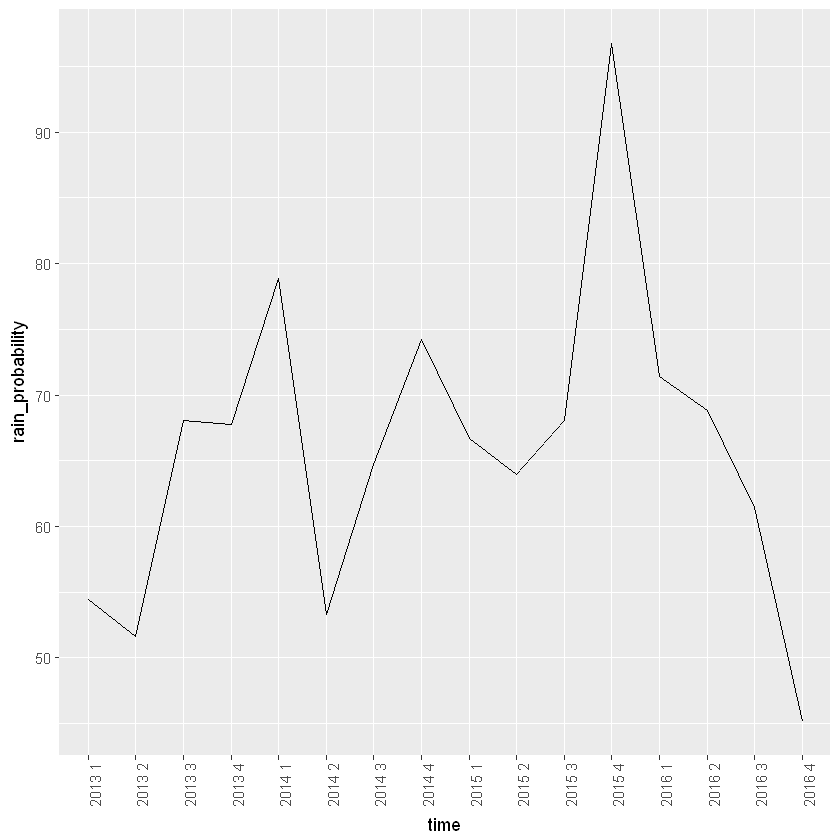

In [40]:
rain_data <- weather %>%
                #group_by(year_month) %>%
                group_by(time=year_trimester) %>%
                summarize(rain_probability = sum(rain)/length(rain) * 100)

p <- rain_data %>%
    ggplot(aes(x=time, y=rain_probability, group=1)) +
        geom_line()  +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

if (FALSE){
    # Image
    svg("data/real-world/images/rain_probability.svg", width=8, height=4)
    p
    dev.off()

    # CSV
    colnames(rain_data) = c('x', 'y')
    write.csv(rain_data, file = "data/real-world/3- for_compositional_analysis/rain.csv")   
}
p

In [ ]:
rain_data <- weather %>%
                #group_by(year_month) %>%
                group_by(time=year_trimester) %>%
                summarize(rain_probability = sum(rain)/length(rain) * 100)

p <- rain_data %>%
    ggplot(aes(x=time, y=rain_probability, group=1)) +
        geom_line()  +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

if (FALSE){
    # Image
    svg("data/real-world/images/rain_probability.svg", width=8, height=4)
    p
    dev.off()

    # CSV
    colnames(rain_data) = c('x', 'y')
    write.csv(rain_data, file = "data/real-world/3- for_compositional_analysis/rain.csv")   
}
p

Non-moving window: precipitation sum

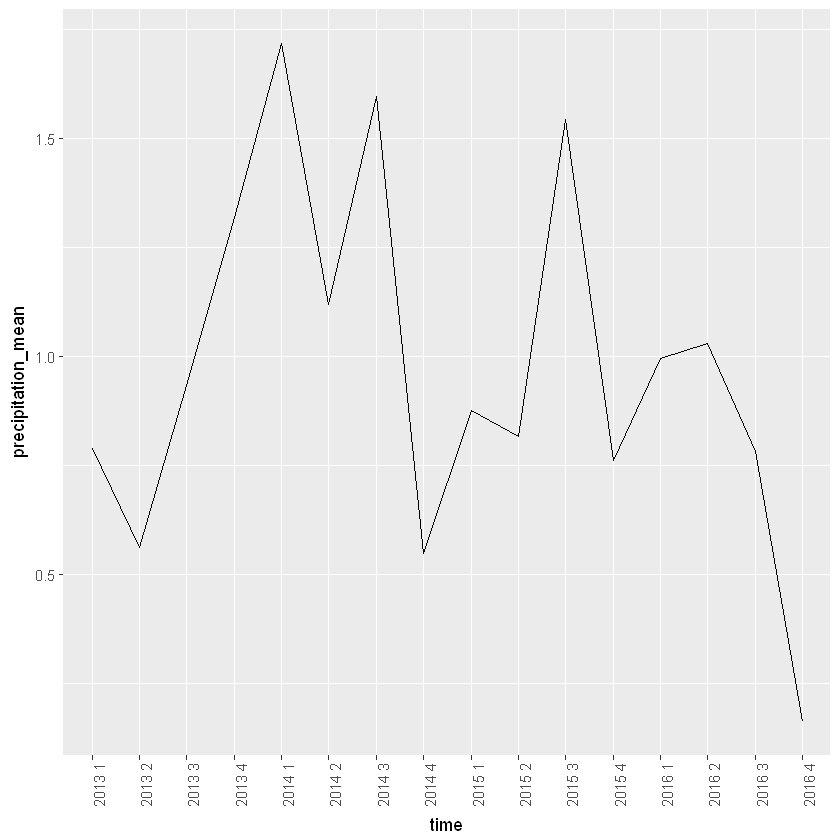

In [37]:
p <- weather %>%
        #group_by(time = year_month) %>%
        group_by(time = year_trimester) %>%
        summarize(precipitation_mean = mean(precipitation_sum_mm)) %>%

     ggplot(aes(x=time, y=precipitation_mean, group=1)) +
        geom_line() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

#svg("data/real-world/images/precipitation.svg", width=8, height=4)
p
#dev.off()

## Salary

In [56]:
salary <- read_csv("data/real-world/2- filtered_and_transformed/salary.csv")

Parsed with column specification:
cols(
  id = col_integer(),
  year_n = col_integer(),
  age_us = col_integer(),
  age_uk = col_integer(),
  usd_per_year = col_integer(),
  year = col_integer()
)


In [71]:
salary_data <- salary %>%
                    filter(age_uk >= 25 & age_uk <= 28)

p <- salary_data %>%
        ggplot(aes(x=age_uk, y=usd_per_year, group=1)) +
            geom_line()

# Image
svg("data/real-world/images/salary.svg", width=8, height=4)
p
dev.off()

# CSV
to_save <- data.frame(salary_data$year, salary_data$usd_per_year)

colnames(to_save) = c('x', 'y')

to_save$x <- paste(to_save$x, '01')

write.csv(to_save, file = "data/real-world/3- for_compositional_analysis/salary.csv")

png 
  2

## Sales

In [82]:
sales <- read_csv("data/real-world/2- filtered_and_transformed/sales.csv")

Parsed with column specification:
cols(
  id = col_integer(),
  Year = col_integer(),
  Month = col_integer(),
  Value = col_double()
)


In [89]:
sales_data <- data.frame(x= paste(sales$Year, sales$Month), y=sales$Value)

sales_data$x <- ifelse(nchar(sales$Month) == 1,
                           paste0(sales$Year, ' 0', sales$Month), 
                           paste0(sales$Year,  ' ', sales$Month))

p <- sales_data %>%
        ggplot(aes(x=x, y=y, group=1)) +
            geom_line() +
            theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Image
svg("data/real-world/images/sales.svg", width=8, height=4)
p
dev.off()

# CSV
write.csv(sales_data, file = "data/real-world/3- for_compositional_analysis/sales.csv")

png 
  2

## Gym members

In [66]:
gym <- read_csv("data/real-world/2- filtered_and_transformed/gym.csv")

Parsed with column specification:
cols(
  id = col_integer(),
  week = col_character(),
  gym_uk = col_integer(),
  day = col_integer(),
  month = col_integer(),
  year = col_integer(),
  days_n = col_character()
)


In [67]:
gym$day <- substr(gym$week, 1, 2)

gym$month <- substr(gym$week, 4, 5)

gym$year <- paste0(20, substr(gym$week, 7, 8))

gym$year_month <- paste(gym$year, gym$month)

In [73]:
gym_data <- gym %>%
        filter(year >= 2013 & year <= 2016) %>%
            group_by(year_month) %>%
            summarize(gym_uk_mean = mean(gym_uk))

p <- gym_data %>%
         ggplot(aes(x=year_month, y=gym_uk_mean, group=1)) +
            geom_line() +
            theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Graph
svg("data/real-world/images/gym.svg", width=8, height=4)
p
dev.off()

# CSV
colnames(gym_data) = c('x', 'y')
write.csv(gym_data, file = "data/real-world/3- for_compositional_analysis/gym.csv")

png 
  2

## Facebook friends

In [74]:
facebook <- read_csv("data/real-world/2- filtered_and_transformed/facebook.csv")

facebook$year_quarter <- paste(facebook$year, facebook$quarter)

Parsed with column specification:
cols(
  id = col_integer(),
  year = col_integer(),
  quarter = col_character(),
  users_millions = col_integer(),
  quarter_n = col_integer(),
  days_n = col_character()
)


In [76]:
p <- facebook %>%
        ggplot(aes(x=year_quarter, y=users_millions, group=1)) +
            geom_line() +
            theme(axis.text.x = element_text(angle = 90, hjust = 1))


# Image
svg("data/real-world/images/facebook.svg", width=8, height=4)
p
dev.off()

# CSV
to_save <- data.frame(facebook$year_quarter, facebook$users_millions)

colnames(to_save) = c('x', 'y')

write.csv(to_save, file = "data/real-world/3- for_compositional_analysis/facebook.csv")

png 
  2

# Trash